# Finding Donor - Charity ML Project
### First import the data

In [1]:
import pandas as pd
import numpy as np
import visuals as vs
%matplotlib inline

data = pd.read_csv('census.csv')
data.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


### Data Exploration
Let's do some data exploration

In [70]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
age                45222 non-null int64
workclass          45222 non-null object
education_level    45222 non-null object
education-num      45222 non-null float64
marital-status     45222 non-null object
occupation         45222 non-null object
relationship       45222 non-null object
race               45222 non-null object
sex                45222 non-null object
capital-gain       45222 non-null float64
capital-loss       45222 non-null float64
hours-per-week     45222 non-null float64
native-country     45222 non-null object
income             45222 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


In [3]:
# Rows = 45222 multiply by Columns = 14
data.size

633108

In [4]:
data.shape

(45222, 14)

In [5]:
#total records
n_rec = data.shape[0]
# Records having salary greater than equal to 50k
n_grt_50k = data[data['income'] == '>50K'].shape[0]
# Records having salary atmost 50k
n_atmst_50k = data[data['income'] == '<=50K'].shape[0]
# percentage of persons having record greater than 50k
p_grt_50k = (n_grt_50k/n_rec)*100

print('Total records: {}'.format(n_rec))
print('Total records >50k: {}'.format(n_grt_50k))
print('Total records <= 50k: {}'.format(n_atmst_50k))
print('Percentage of records >50k: {}'.format(p_grt_50k))

Total records: 45222
Total records >50k: 11208
Total records <= 50k: 34014
Percentage of records >50k: 24.78439697492371


#### Skewed Data Processing
Here we can see that there is the skweness in the capital-gain and capital-loss data. So we need to normalize it.

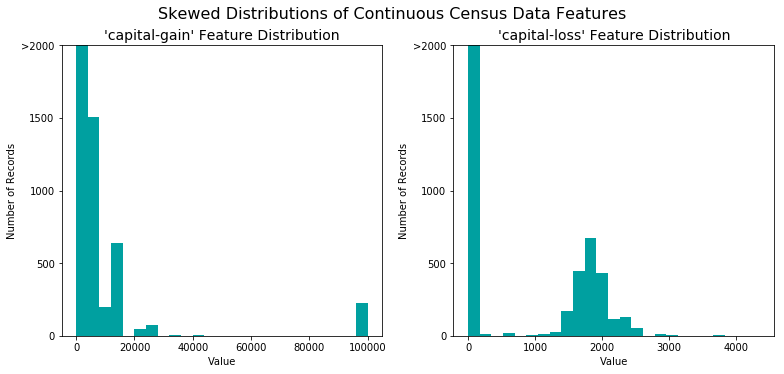

In [6]:
vs.distribution(data)

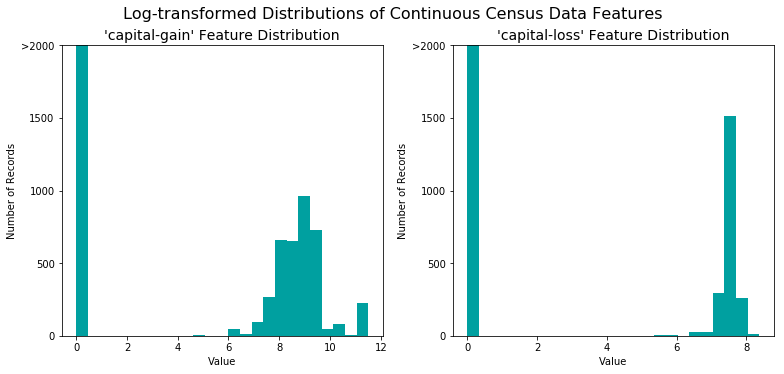

In [7]:
income_d = data['income']
features_d = data.drop('income', axis = 1)

# Lets tranform it to lograthmic scale as it distributet the data evenly
skewed_fetaures = ['capital-gain', 'capital-loss']
feature_log_d = features_d
feature_log_d[skewed_fetaures]  = features_d[skewed_fetaures].apply(lambda x: np.log(x+1))
vs.distribution(feature_log_d, transformed = True)

#### Normalising the numerical data
Here we normalises the other numerical features like education_num, capital-gain, capital-loss, hours-per-week

In [8]:
from sklearn.preprocessing import MinMaxScaler

s = MinMaxScaler()
n = ['age','education-num','capital-gain','capital-loss','hours-per-week']
feature_log_minmax_d = feature_log_d
feature_log_minmax_d[n] = s.fit_transform(feature_log_d[n])

In [9]:
feature_log_minmax_d.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


#### One-hot-encoding
Now we need to do one-hot encoding for categorical variables as ML gives less efficient outputs on String inputs

In [10]:
features = pd.get_dummies(feature_log_minmax_d)
income = income_d.apply(lambda a: 1 if a=='>50K' else 0)

total_features = list(features.columns)
#print(len(total_features))
#print(total_features)
income.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

Data Preprocessing and Exploration is done

### Start Implementing Code for ML
First we will do split of data into training and testing set

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, income, test_size = 0.2, random_state = 0)

print('Training smaple size: {}'.format(X_train.shape[0]))
print('Testing smaple size: {}'.format(X_test.shape[0]))

Training smaple size: 36177
Testing smaple size: 9045


#### Implementation of Navie Predictor
Now we make a Naive Predictor model where we have a model which predicts 1 always (i.e., y_pred = 1). We do it because we shoudld do some dirty works to see how a model works without any intelligency.

In [34]:
TP = np.sum(income)
FP = income.count() - TP
TN = 0
FN = 0
accuracy = float(TP)/float(TP+FP)
print('Accuracy: {}'.format(float(TP)/float(TP+FP)))
print('Precision: {}'.format(float(TP)/float(TP+FP)))
print('Recall: {}'.format(float(TP)/float(TP+FN)))
p= float(TP)/float(TP+FP)
r= float(TP)/float(TP+FN)
fscore = (1+0.5**2)*(p*r/((0.5**2)*p+r))
print('F1 score: {}'.format(f1_score))

Accuracy: 0.2478439697492371
Precision: 0.2478439697492371
Recall: 1.0
F1 score: 0.29172913543228385


#### Implementation of Supervised Learning
So now we have seen that if our model always predict y=1, then our accuracy and f1 score would't give good value and we can say, it is not a good model.

Let's create some Supervised Learning model we have in scikit learn and see how well they do. 

To properly evaluate the performance of each model, it is important to create a training and predicting pipeline that allows us to quckly and effectively trains models using various sizes of training data and perform prediction on testing data. Let's do one:


In [36]:
from time import time
from sklearn.metrics import fbeta_score, accuracy_score

def train_predict_fun(learner, sample_size, X_train, y_train, X_test, y_test):
    result = {}
    
    #fititng the models on traing sampled data
    start = time()
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time()
    
    result['train_time'] = end - start
    
    # prediction on test data and 300 training data
    start = time()
    predict_test = learner.predict(X_test)
    predict_train = learner.predict(X_train[:300])
    end = time()
    
    result['pred_time'] = end - start
    
    # Copute accuracy and fbeta_score beta = 0.5 of all predictions
    result['acc_train'] = accuracy_score(y_train[:300], predict_train)
    result['acc_test'] = accuracy_score(y_test, predict_test)
    result['f_train'] = fbeta_score(y_train[:300], predict_train, beta = 0.5)
    result['f_test'] = fbeta_score(y_test, predict_test, beta = 0.5)
    
    print('{} trained on {} samples'.format(learner.__class__.__name__, sample_size))
    
    return result
    

Implementing the models, here we will do it for 3 models: GradinetBoostingClassifier, RandomForestClassifier, LogisticRegression, GaussianNB

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from pprint import pprint

clf_a = GradientBoostingClassifier()
clf_b = RandomForestClassifier()
clf_c = LogisticRegression()
clf_d = GaussianNB()


samples_100 = len(y_train)
samples_10 = int(len(y_train)/10)
samples_1 = int(len(y_train)/100)

# Collect result on the learners
results = {}
for clf in [clf_a, clf_b, clf_c, clf_d]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = train_predict_fun(clf, samples, X_train, y_train, X_test, y_test)

pprint(results)

GradientBoostingClassifier trained on 361 samples
GradientBoostingClassifier trained on 3617 samples
GradientBoostingClassifier trained on 36177 samples
RandomForestClassifier trained on 361 samples
RandomForestClassifier trained on 3617 samples
RandomForestClassifier trained on 36177 samples
LogisticRegression trained on 361 samples
LogisticRegression trained on 3617 samples
LogisticRegression trained on 36177 samples
GaussianNB trained on 361 samples
GaussianNB trained on 3617 samples
GaussianNB trained on 36177 samples
{'GaussianNB': {0: {'acc_test': 0.3517965726920951,
                    'acc_train': 0.4,
                    'f_test': 0.3101343466682625,
                    'f_train': 0.3333333333333333,
                    'pred_time': 0.0359036922454834,
                    'train_time': 0.0019948482513427734},
                1: {'acc_test': 0.3660585959093422,
                    'acc_train': 0.38333333333333336,
                    'f_test': 0.32025811848355396,
             

GradientBoostingClassifier trained on 361 samples
GradientBoostingClassifier trained on 3617 samples
GradientBoostingClassifier trained on 36177 samples
RandomForestClassifier trained on 361 samples
RandomForestClassifier trained on 3617 samples
RandomForestClassifier trained on 36177 samples
LogisticRegression trained on 361 samples
LogisticRegression trained on 3617 samples
LogisticRegression trained on 36177 samples


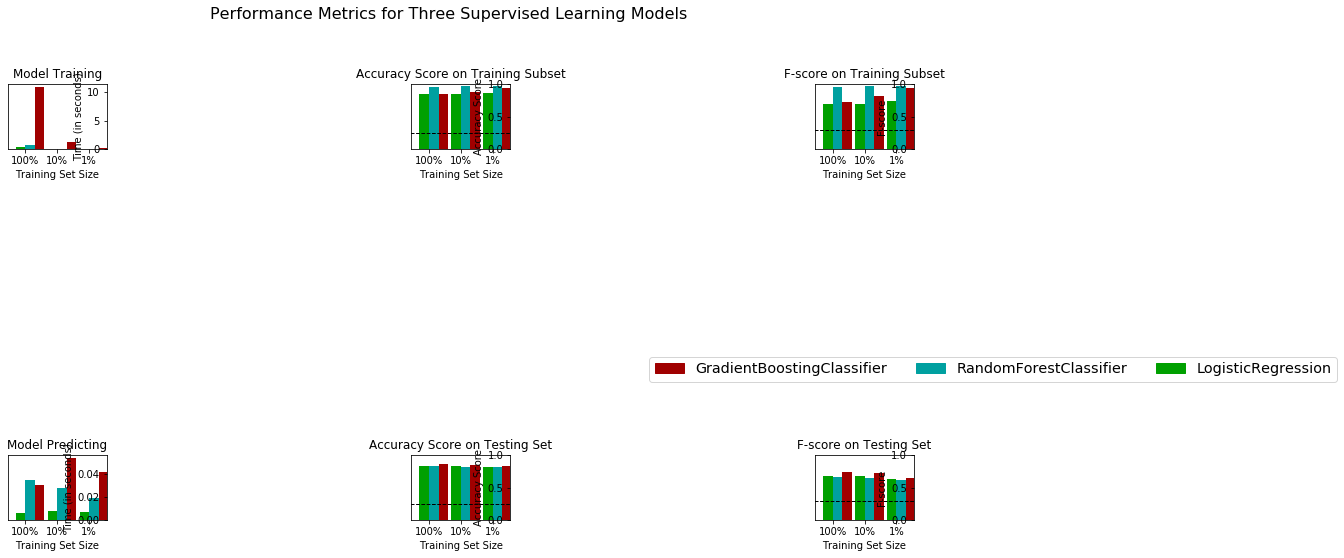

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

clf_a = GradientBoostingClassifier()
clf_b = RandomForestClassifier()
clf_c = LogisticRegression()


samples_100 = len(y_train)
samples_10 = int(len(y_train)/10)
samples_1 = int(len(y_train)/100)

# Collect result on the learners
results = {}
for clf in [clf_a, clf_b, clf_c]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = train_predict_fun(clf, samples, X_train, y_train, X_test, y_test)

vs.evaluate(results, accuracy, fscore)

In [41]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer, r2_score, fbeta_score

clf = GradientBoostingClassifier(random_state=42)

parameters = {'n_estimators': [100, 300, 500],'learning_rate': [0.1, 1, 1.3]}

scorer = make_scorer(fbeta_score, beta=0.5)

grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

grid_fit = grid_obj.fit(X_train, y_train)

best_clf = grid_fit.best_estimator_

normal_predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, normal_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, normal_predictions, beta = 0.5)))
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Accuracy score on testing data: 0.8630
F-score on testing data: 0.7395
Final accuracy score on the testing data: 0.8719
Final F-score on the testing data: 0.7547


Now We can see the accuracy is imporved by 0.0089 and fscore by 0.0152

#### Feature Selection

Let's try feature selection also using feature_importances_ attributes of few algorithms.

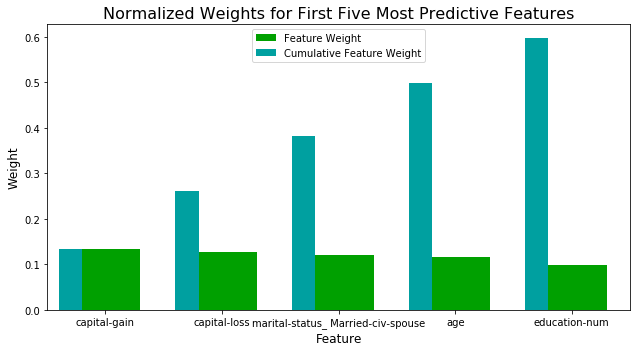

In [43]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
importances = model.feature_importances_
vs.feature_plot(importances, X_train, y_train)

#Note the graph shows top 5 features only as it is coded same in Visual module

In [46]:
from sklearn.base import clone

#reduce the fature space
X_train_red = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_red = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

clf = (clone(best_clf)).fit(X_train_red, y_train)

red_pred = clf.predict(X_test_red)

print('Model trainned on full data')
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print('Model trainned on reduced data')
print("Final accuracy score on the reduced testing data: {:.4f}".format(accuracy_score(y_test, red_pred)))
print("Final F-score on the reduced testing data: {:.4f}".format(fbeta_score(y_test, red_pred, beta = 0.5)))

Model trainned on full data
Final accuracy score on the testing data: 0.8719
Final F-score on the testing data: 0.7547
Model trainned on reduced data
Final accuracy score on the reduced testing data: 0.8589
Final F-score on the reduced testing data: 0.7257


#### Findings:
After reducing few features, the fscore and accuracy reduced a bit. If time is not a constraint then I wouldn't prefer to select the reducton of features. 